### NOMBRE PROYECTO: Lung Cancer

### FECHA: 

## CONTEXTO




### DESCRIPCIÓN DE LA DATA

- **Gender:** M(male), F(female)
- **Age:** Age of the patient
- **Smoking:** YES=2 , NO=1.
- **Yellow fingers:** YES=2 , NO=1.
- **Anxiety:** YES=2 , NO=1.
- **Peer_pressure:** YES=2 , NO=1.
- **Chronic Disease:** YES=2 , NO=1.
- **Fatigue:** YES=2 , NO=1.
- **Allergy:** YES=2 , NO=1.
- **Wheezing:** YES=2 , NO=1.
- **Alcohol:** YES=2 , NO=1.
- **Coughing:** YES=2 , NO=1.
- **Shortness of Breath:** YES=2 , NO=1.
- **Swallowing Difficulty:** YES=2 , NO=1.
- **Chest pain:** YES=2 , NO=1.
- **Lung Cancer:** YES , NO.



## METODOLOGÍA UTILIZADA EN EL PROYECTO DE CIENCIA DE DATOS
## NOMBRE: CRISP-DM
* FASE 1: Comprensión del Negocio: objetivos especificos de la fase
* FASE 2: Comprensión de los datos: objetivos especificos de la fase
* FASE 3: Preparación de los datos: objetivos especificos de la fase
* FASE 4: Modelado: objetivos especificos de la fase
* FASE 5: Evaluación del modelo: objetivos especificos de la fase
* FASE 6: Despliegue: objetivos especificos de la fase

# FASE 1: Comprensión del Negocio

In [1]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import joblib

# Ignorar warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
#Carga Dataset
df = pd.read_csv('data.csv', sep=",")

In [3]:
# Verificar el desbalance de clases
frecuencia_clases = df['LUNG_CANCER'].value_counts()
print(frecuencia_clases)


LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


# FASE 2: Comprensión de los datos

In [4]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0               

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
info = df.shape
print("\nLa cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (309, 16)


In [7]:
tipos = df.dtypes
print("\nTipos de datos presentes en el dataset:\n",tipos)


Tipos de datos presentes en el dataset:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Análisis Univariado

### Análisis Univariado: **AGE**

Análisis Univariado de la Variable 'Age'
Media: 62.67
Mediana: 62.00
Desviación Estándar: 8.20
Valor Mínimo: 21.00
Valor Máximo: 87.00


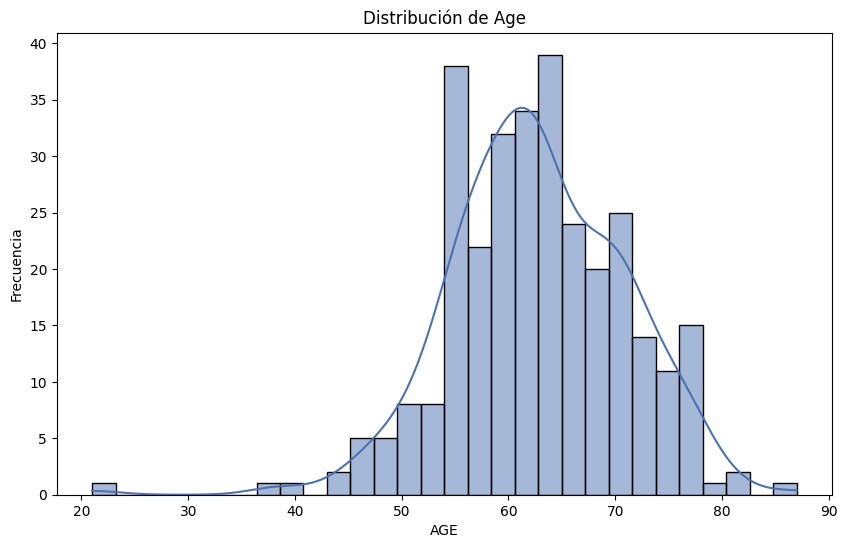

In [9]:
# Descripción estadística básica de la variable 'Age'
AGE_mean = np.mean(df['AGE'])
AGE_median = np.median(df['AGE'])
AGE_std = np.std(df['AGE'])
AGE_min = np.min(df['AGE'])
AGE_max = np.max(df['AGE'])

print("Análisis Univariado de la Variable 'Age'")
print(f"Media: {AGE_mean:.2f}")
print(f"Mediana: {AGE_median:.2f}")
print(f"Desviación Estándar: {AGE_std:.2f}")
print(f"Valor Mínimo: {AGE_min:.2f}")
print(f"Valor Máximo: {AGE_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Age')
plt.xlabel('AGE')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **SMOKING**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
SMOKING
2    174
1    135
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


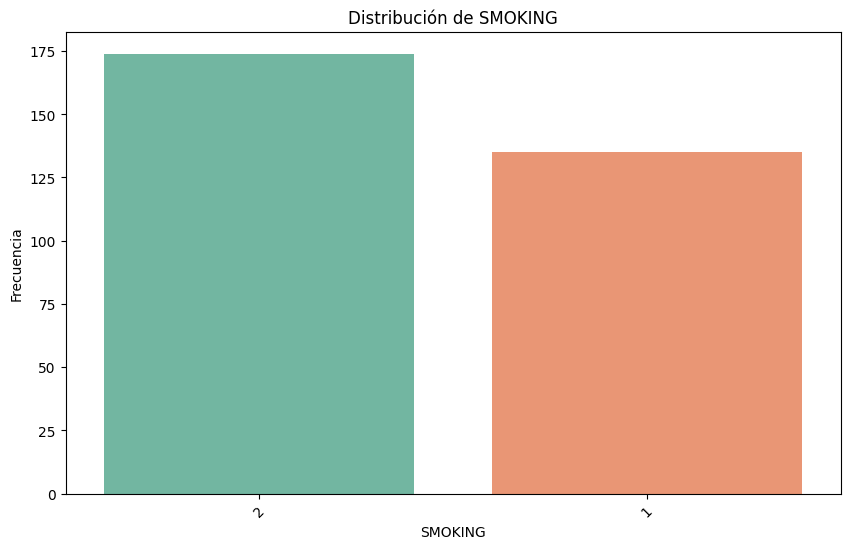

In [10]:
# Descripción estadística básica de la variable 'zona' (top 10)
values_smoking = df['SMOKING'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

# Gráfico de barras para las 10 zonas con mayor población
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKING', data=df[df['SMOKING'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de SMOKING')
plt.xlabel('SMOKING')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Análisis Univariado: **YELLOW FINGERS**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


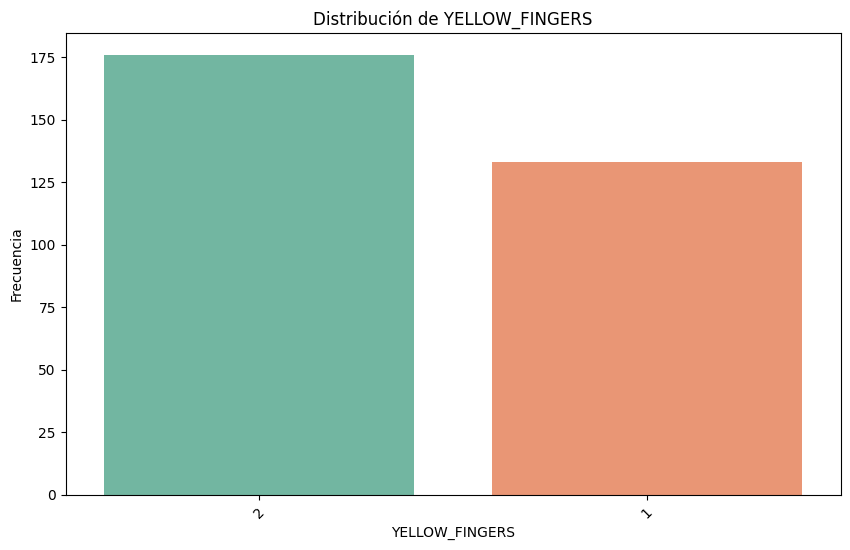

In [11]:

values_smoking = df['YELLOW_FINGERS'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='YELLOW_FINGERS', data=df[df['YELLOW_FINGERS'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de YELLOW_FINGERS')
plt.xlabel('YELLOW_FINGERS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Análisis Univariado: **Zona**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
ANXIETY
1    155
2    154
Name: count, dtype: int64
Moda (Categoría más frecuente): 1


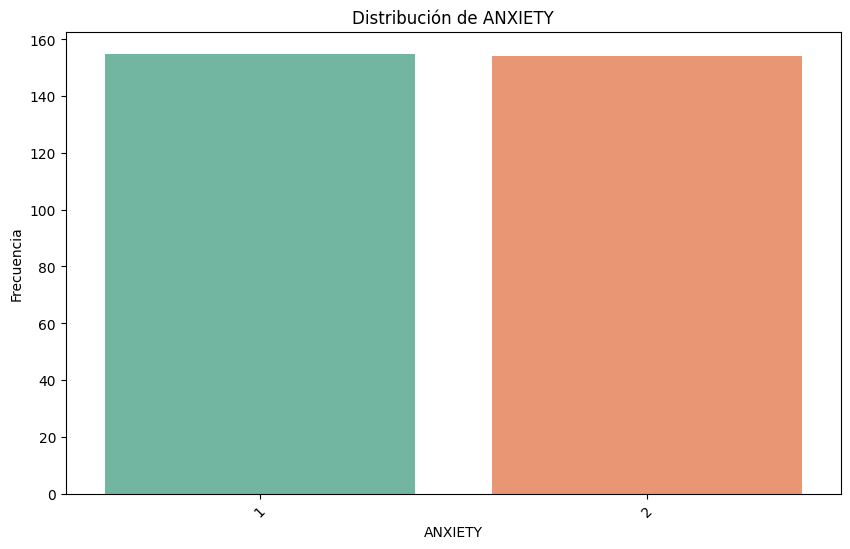

In [12]:

values_smoking = df['ANXIETY'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='ANXIETY', data=df[df['ANXIETY'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de ANXIETY')
plt.xlabel('ANXIETY')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Análisis Univariado: **Nivel educación**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


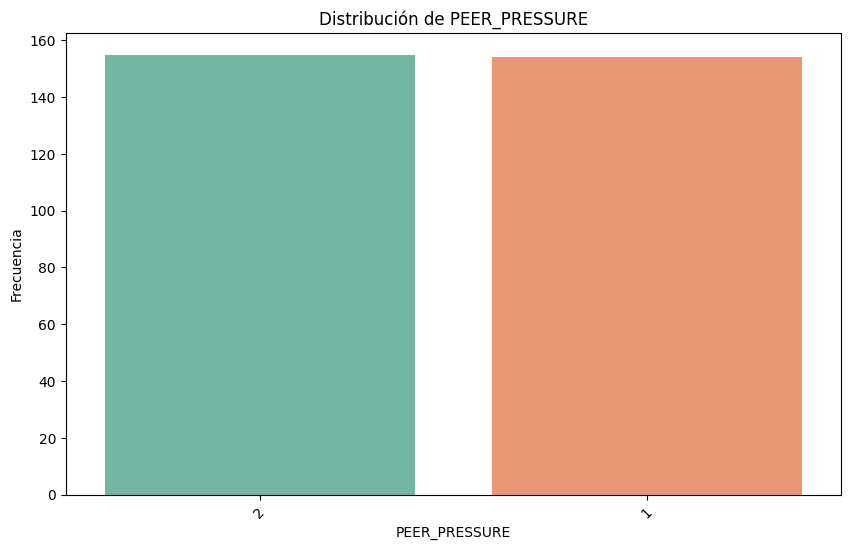

In [13]:

values_smoking = df['PEER_PRESSURE'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='PEER_PRESSURE', data=df[df['PEER_PRESSURE'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de PEER_PRESSURE')
plt.xlabel('PEER_PRESSURE')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


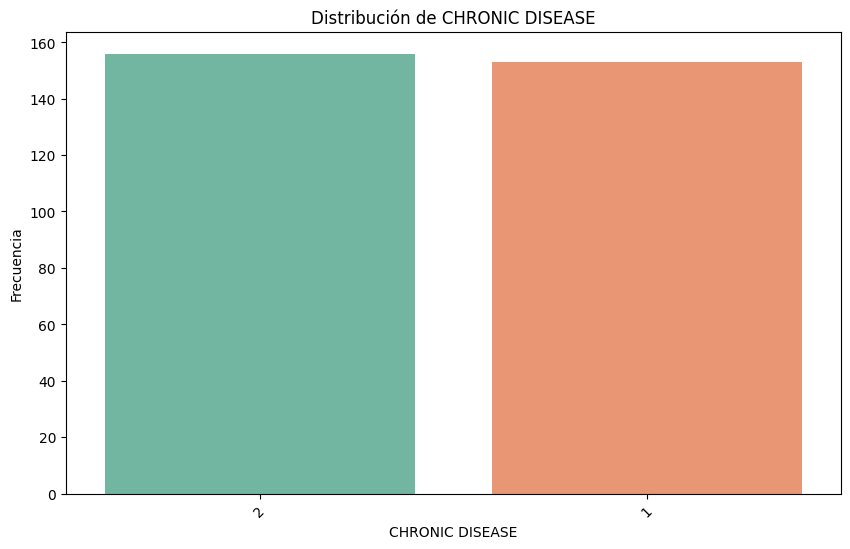

In [14]:

values_smoking = df['CHRONIC DISEASE'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='CHRONIC DISEASE', data=df[df['CHRONIC DISEASE'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de CHRONIC DISEASE')
plt.xlabel('CHRONIC DISEASE')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
FATIGUE 
2    208
1    101
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


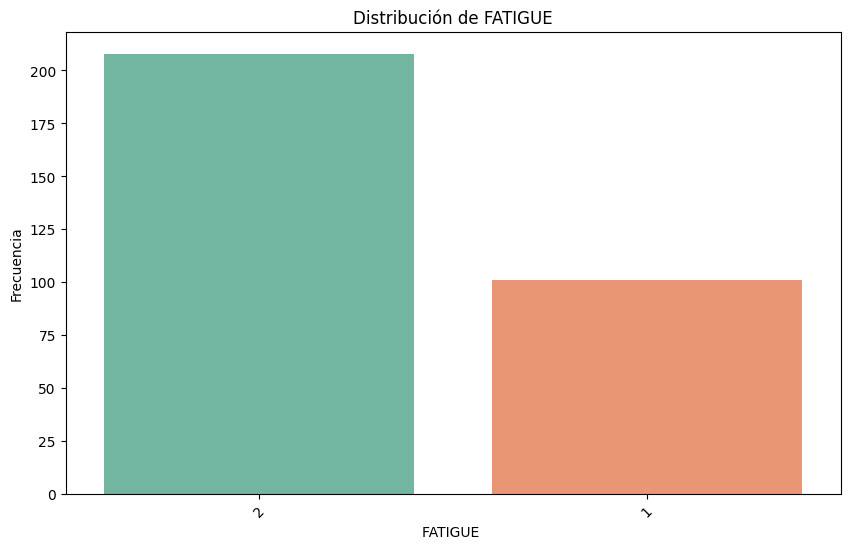

In [15]:

values_smoking = df['FATIGUE '].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='FATIGUE ', data=df[df['FATIGUE '].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de FATIGUE')
plt.xlabel('FATIGUE ')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
ALLERGY 
2    172
1    137
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


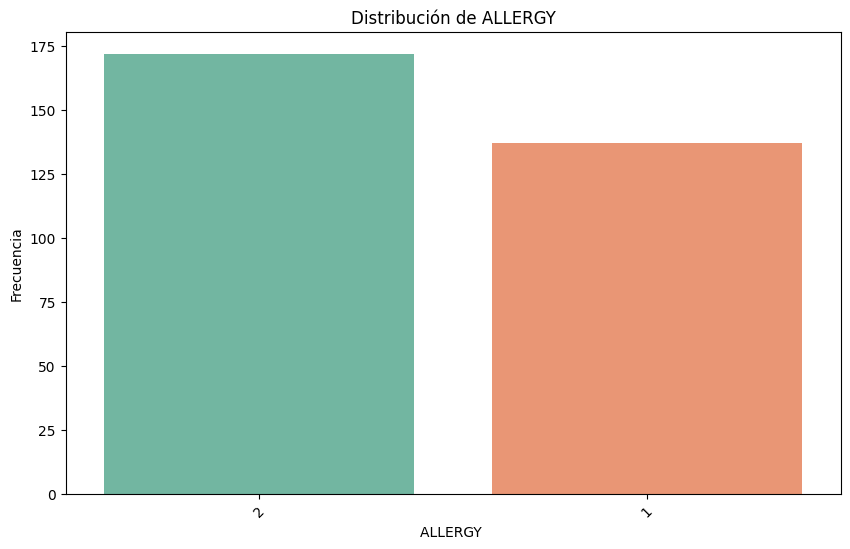

In [16]:

values_smoking = df['ALLERGY '].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='ALLERGY ', data=df[df['ALLERGY '].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de ALLERGY')
plt.xlabel('ALLERGY ')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
WHEEZING
2    172
1    137
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


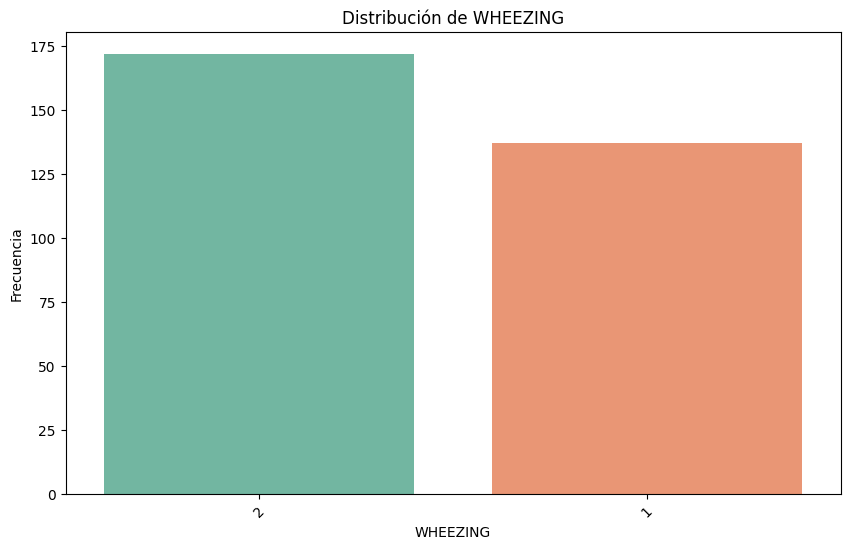

In [17]:

values_smoking = df['WHEEZING'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='WHEEZING', data=df[df['WHEEZING'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de WHEEZING')
plt.xlabel('WHEEZING')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


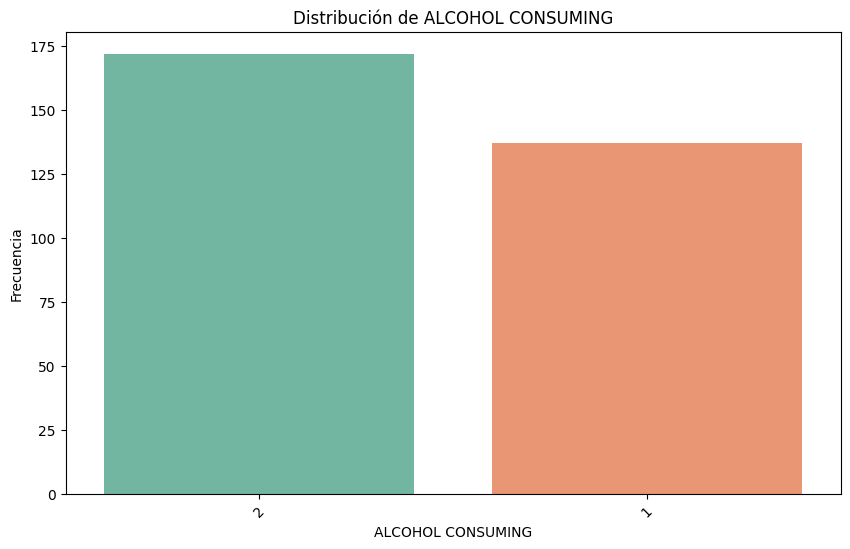

In [18]:

values_smoking = df['ALCOHOL CONSUMING'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='ALCOHOL CONSUMING', data=df[df['ALCOHOL CONSUMING'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de ALCOHOL CONSUMING')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
COUGHING
2    179
1    130
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


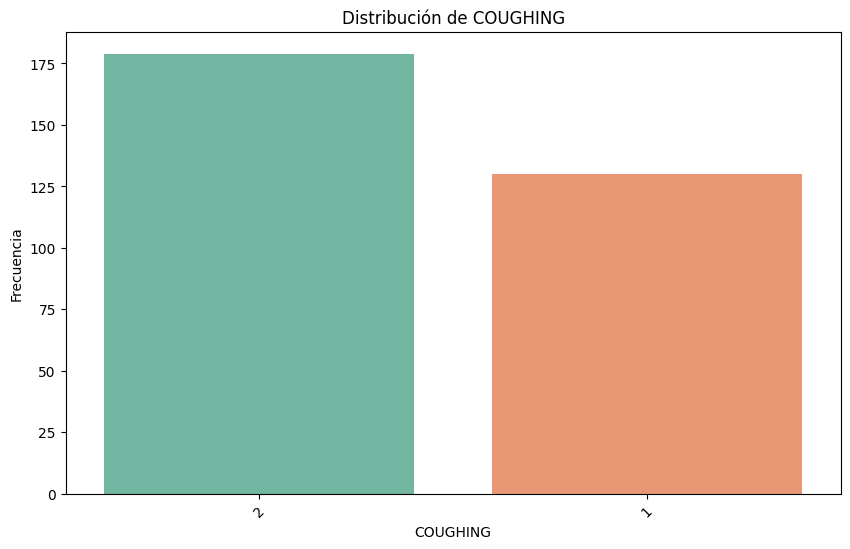

In [19]:

values_smoking = df['COUGHING'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='COUGHING', data=df[df['COUGHING'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de COUGHING')
plt.xlabel('COUGHING')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
SHORTNESS OF BREATH
2    198
1    111
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


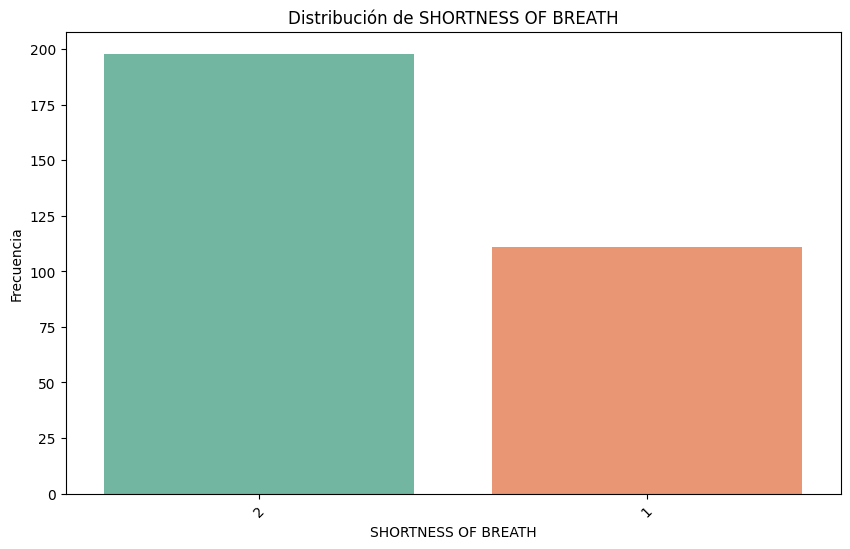

In [20]:

values_smoking = df['SHORTNESS OF BREATH'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='SHORTNESS OF BREATH', data=df[df['SHORTNESS OF BREATH'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de SHORTNESS OF BREATH')
plt.xlabel('SHORTNESS OF BREATH')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
SWALLOWING DIFFICULTY
1    164
2    145
Name: count, dtype: int64
Moda (Categoría más frecuente): 1


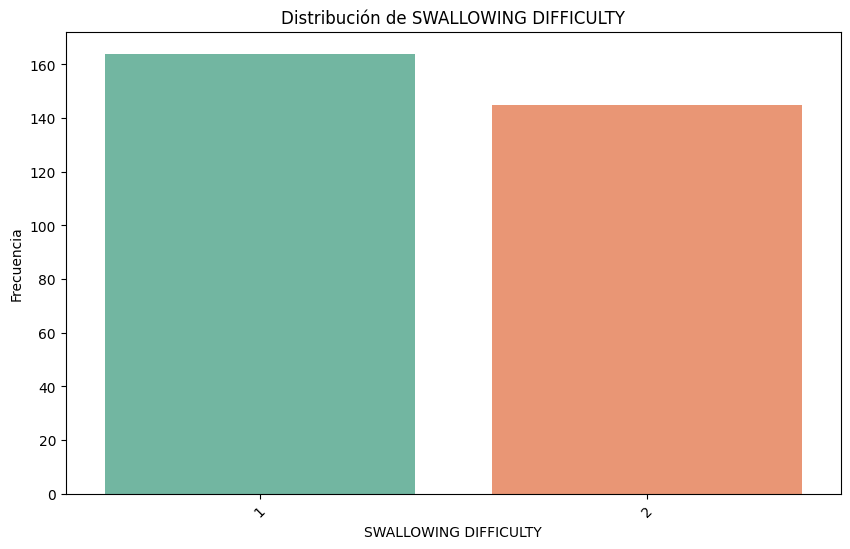

In [21]:

values_smoking = df['SWALLOWING DIFFICULTY'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='SWALLOWING DIFFICULTY', data=df[df['SWALLOWING DIFFICULTY'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de SWALLOWING DIFFICULTY')
plt.xlabel('SWALLOWING DIFFICULTY')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
CHEST PAIN
2    172
1    137
Name: count, dtype: int64
Moda (Categoría más frecuente): 2


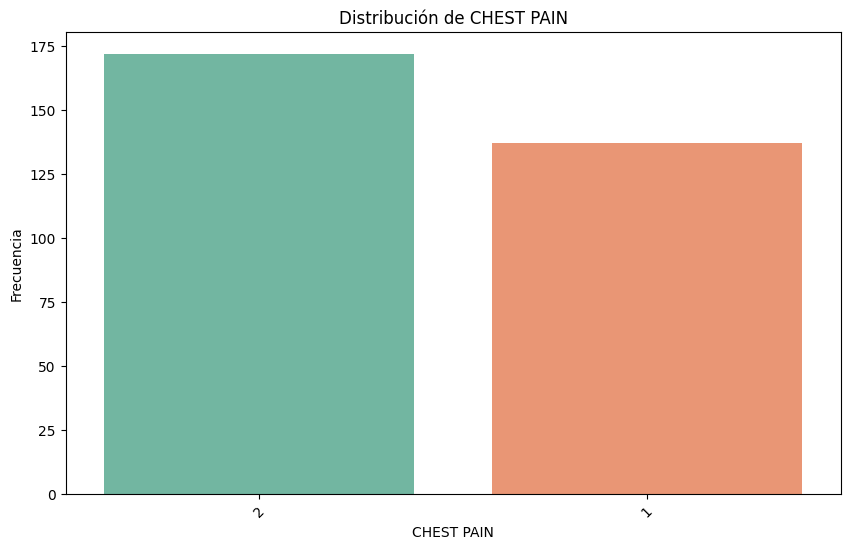

In [22]:

values_smoking = df['CHEST PAIN'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='CHEST PAIN', data=df[df['CHEST PAIN'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de CHEST PAIN')
plt.xlabel('CHEST PAIN')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64
Moda (Categoría más frecuente): YES


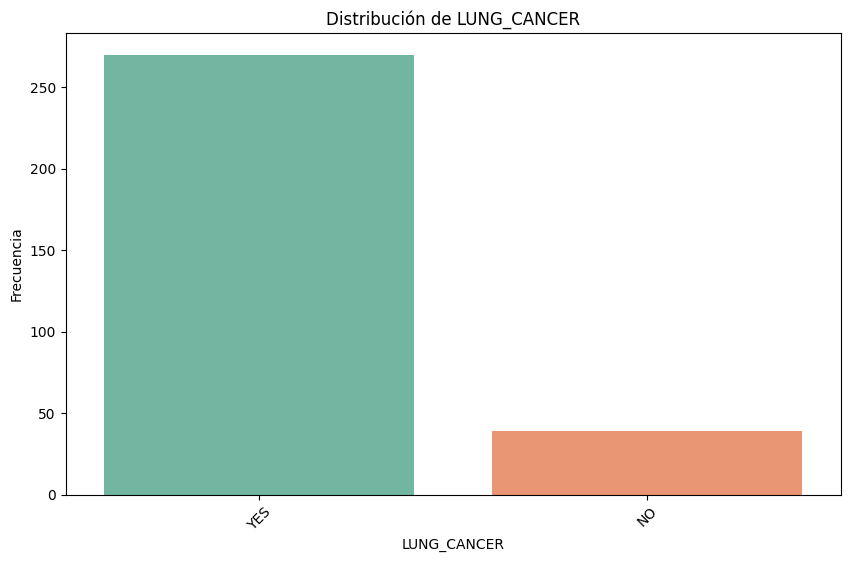

In [23]:

values_smoking = df['LUNG_CANCER'].value_counts()
moda_smoking = values_smoking.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{values_smoking}")
print(f"Moda (Categoría más frecuente): {moda_smoking}")

plt.figure(figsize=(10, 6))
sns.countplot(x='LUNG_CANCER', data=df[df['LUNG_CANCER'].isin(values_smoking.index)], order=values_smoking.index, palette='Set2')
plt.title('Distribución de LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## Análisis Bivariado

### GENDER vs LUNG_CANCER: ¿El género afecta la probabilidad de cáncer de pulmón? Puedes usar un gráfico de barras agrupado o una tabla cruzada.

Text(0.5, 1.0, 'Distribución de GENDER frente a LUNG_CANCER')

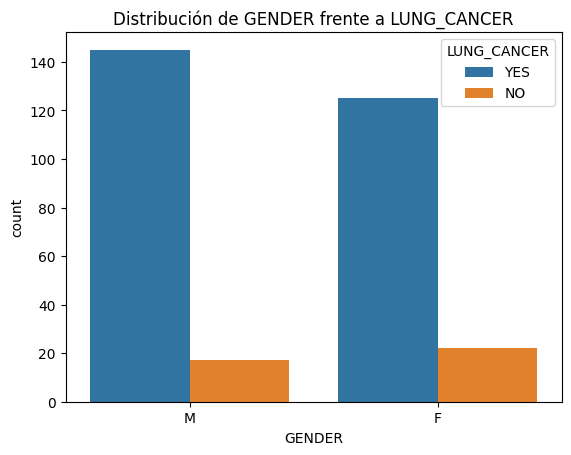

In [24]:
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Distribución de GENDER frente a LUNG_CANCER')


### SMOKING vs LUNG_CANCER: ¿El tabaquismo (SMOKING) está fuertemente relacionado con el cáncer de pulmón?

Text(0.5, 1.0, 'Relación entre fumar y cáncer de pulmón')

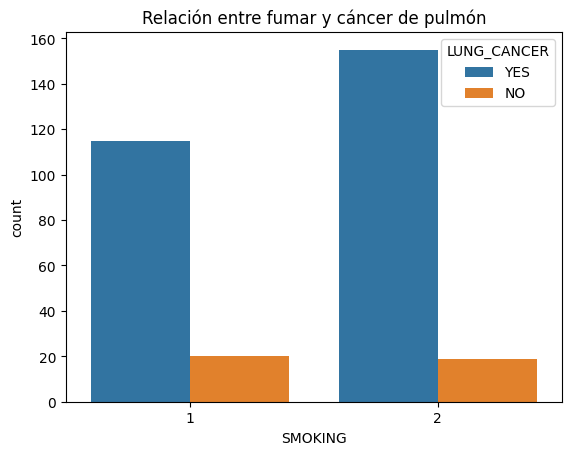

In [25]:
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Relación entre fumar y cáncer de pulmón')


### ANXIETY vs LUNG_CANCER: ¿Personas con ansiedad tienen más probabilidad de tener cáncer de pulmón?

Text(0.5, 1.0, 'Relación entre ansiedad y cáncer de pulmón')

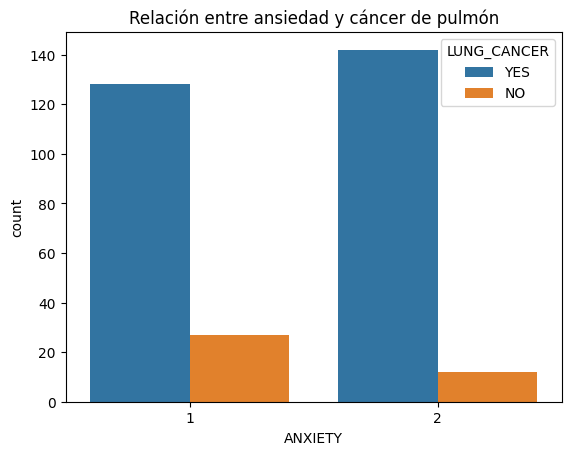

In [26]:
sns.countplot(x='ANXIETY', hue='LUNG_CANCER', data=df)
plt.title('Relación entre ansiedad y cáncer de pulmón')


### AGE vs LUNG_CANCER: ¿La edad es un factor que influye en el cáncer de pulmón?

Text(0.5, 1.0, 'Distribución de la edad según el diagnóstico de cáncer de pulmón')

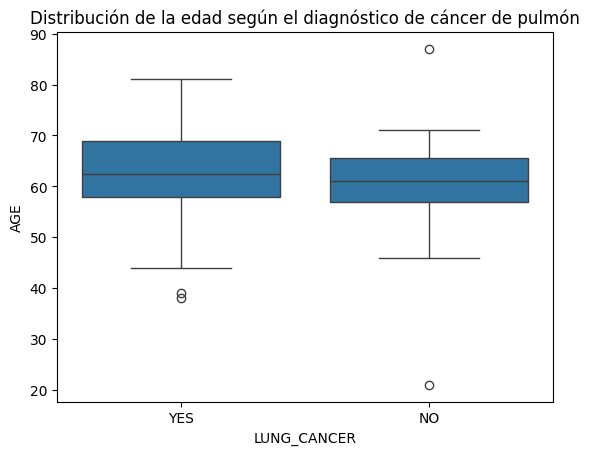

In [27]:
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df)
plt.title('Distribución de la edad según el diagnóstico de cáncer de pulmón')


### Correlación entre variables continuas: ¿Cómo se relacionan variables como AGE, SMOKING, y ALCOHOL_CONSUMING entre sí?

Text(0.5, 1.0, 'Mapa de calor de correlación entre variables continuas')

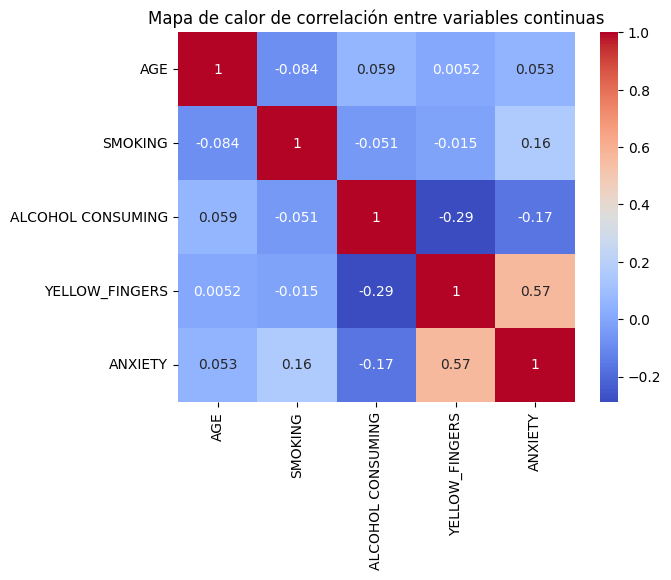

In [28]:
corr = df[['AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'YELLOW_FINGERS', 'ANXIETY']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre variables continuas')


### SMOKING vs COUGHING: ¿Las personas que fuman tienen más probabilidad de tener tos?

Text(0.5, 1.0, 'Relación entre fumar y toser')

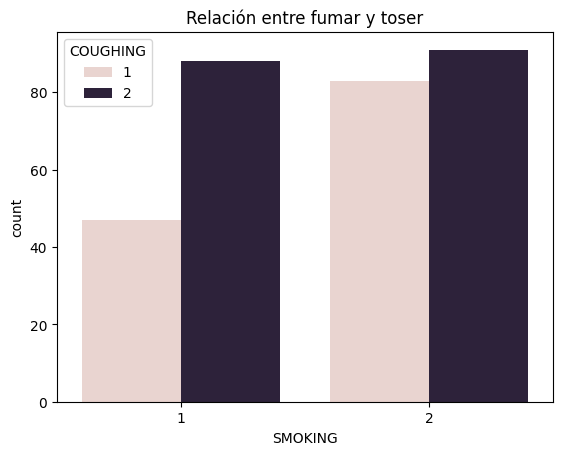

In [29]:
sns.countplot(x='SMOKING', hue='COUGHING', data=df)
plt.title('Relación entre fumar y toser')


### ALCOHOL CONSUMING vs SHORTNESS OF BREATH: ¿El consumo de alcohol se relaciona con dificultades para respirar?

Text(0.5, 1.0, 'Relación entre el consumo de alcohol y dificultad para respirar')

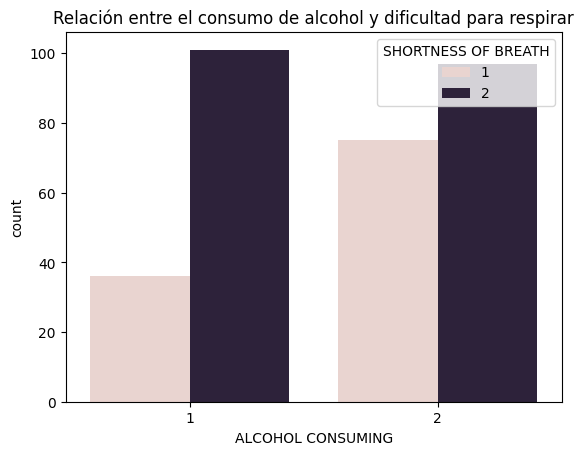

In [30]:
sns.countplot(x='ALCOHOL CONSUMING', hue='SHORTNESS OF BREATH', data=df)
plt.title('Relación entre el consumo de alcohol y dificultad para respirar')


### COUGHING vs LUNG_CANCER: ¿Las personas que presentan tos tienen más probabilidad de tener cáncer de pulmón?

Text(0.5, 1.0, 'Relación entre tos y cáncer de pulmón')

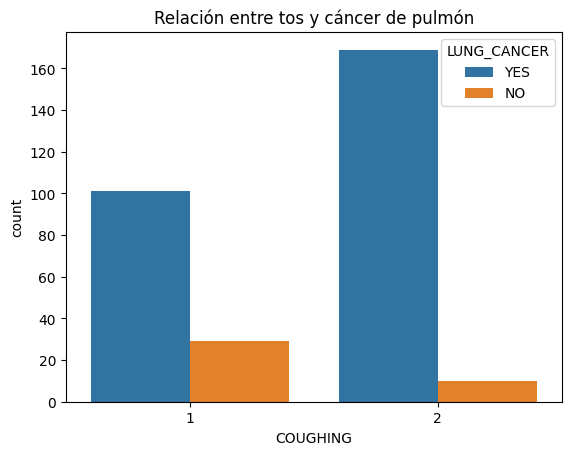

In [31]:
sns.countplot(x='COUGHING', hue='LUNG_CANCER', data=df)
plt.title('Relación entre tos y cáncer de pulmón')


### CHEST PAIN vs LUNG_CANCER: ¿El dolor en el pecho es más común en personas con cáncer de pulmón?

Text(0.5, 1.0, 'Relación entre dolor en el pecho y cáncer de pulmón')

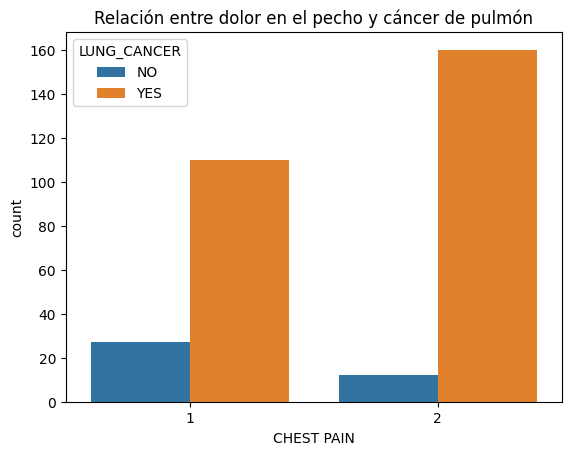

In [32]:
sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data=df)
plt.title('Relación entre dolor en el pecho y cáncer de pulmón')


### AGE vs FATIGUE: ¿Las personas más jóvenes o mayores tienen más fatiga?

Text(0.5, 1.0, 'Distribución de la fatiga según la edad')

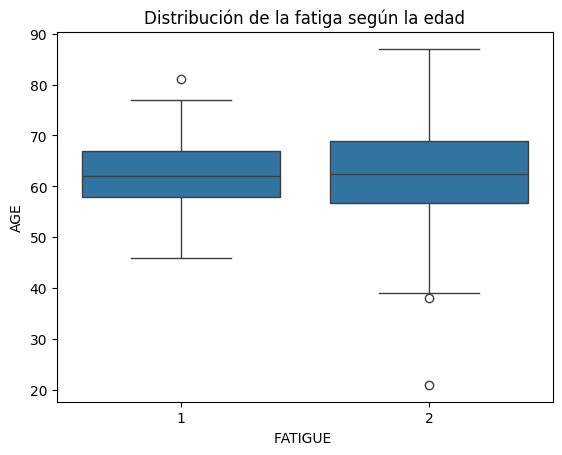

In [33]:
sns.boxplot(x='FATIGUE ', y='AGE', data=df)
plt.title('Distribución de la fatiga según la edad')


## Análisis de Tendencias

## Resumen de Hallazgos Clave

# FASE 3: Preparación de los datos

### Durante dla preparación de los datos vamos a realizar transformaciones sobre los valores nulos y también  las variables categóricas las cuales vamos a aplicar métodos de transformación como One-Hot Encoding o Label Encoding

### Ademas realizar la tranformacion del nombre de las variable, ya que dhay algunas la cuales estan mal digitadas o contienenen caracteres no deseados

### vareialbes a editar de nombre

In [34]:
df = df.rename(columns={'CHRONIC DISEASE': 'CHRONIC_DISEASE'})
df = df.rename(columns={'FATIGUE ': 'FATIGUE'})
df = df.rename(columns={'ALLERGY  ': 'ALLERGY'})
df = df.rename(columns={'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING'})
df = df.rename(columns={'SHORTNESS OF BREATH ': 'SHORTNESS_BREATH'})
df = df.rename(columns={'SWALLOWING DIFFICULTY': 'SWALLOWING_DIFFICULTY'})
df = df.rename(columns={'CHEST PAIN': 'CHEST_PAIN'})

### varible gender y lung cancer

In [37]:
# Usando replace para realizar la conversión
df['GENDER'] = df['GENDER'].replace({'M': 2, 'F': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})

print(df)


     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         2   69        1               2        2              1   
1         2   74        2               1        1              1   
2         1   59        1               1        1              2   
3         2   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       2   70        2               1        1              1   
306       2   58        2               1        1              1   
307       2   67        2               1        2              1   
308       2   62        1               1        1              2   

     CHRONIC_DISEASE  FATIGUE  ALLERGY   WHEEZING  ALCOHOL_CONSUMING  \
0                  1        2         1         2                  2   
1                  2       

### Ademas de la aplicacion de balanceo de datos, como nuestra variable obetiva hay mucha diferencia entre ambas clases, lo cual puede afectar de mala manera a nuestros datos los cuales van a ser aplicados a un modelo predictivos posteriormente

### Seleccion de las mejores variables o variables mas afin para neuestra variable objetivo usado un mapa de correlacion o tambien aplicando el valor p para la seleccion de estas

### Tratamiento de variables Cualitativas

In [35]:
# Aplicar One-Hot Encoding en la columna 'vivienda'
df = pd.get_dummies(df, columns=['vivienda'], prefix='vivienda')

# Ver el resultado
df.head()

KeyError: "None of [Index(['vivienda'], dtype='object')] are in the [columns]"

In [185]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding en la columna 'nivel_educ'
df['nivel_educ'] = le.fit_transform(df['nivel_educ'])

# Ver el resultado
df[['nivel_educ', 'nivel_educ']].head()

,nivel_educ,nivel_educ
0,3,3
1,2,2
2,3,3
3,2,2
4,2,2


### tenemos que hacer transformacion de datos nulos en las siguientes variables
exp_sf, linea_sf y deuda_sf

In [187]:
# Imputación por media
df['exp_sf'] = df['exp_sf'].fillna(df['exp_sf'].mean())
df['linea_sf'] = df['linea_sf'].fillna(df['linea_sf'].mean())
df['deuda_sf'] = df['deuda_sf'].fillna(df['deuda_sf'].mean())


In [188]:
df.isnull().sum()

mora                  0
atraso                0
edad                  0
dias_lab              0
exp_sf                0
nivel_ahorro          0
ingreso               0
linea_sf              0
deuda_sf              0
score                 0
zona                  0
clasif_sbs            0
nivel_educ            0
vivienda_ALQUILADA    0
vivienda_FAMILIAR     0
vivienda_PROPIA       0
dtype: int64

# FASE 4: Modelado

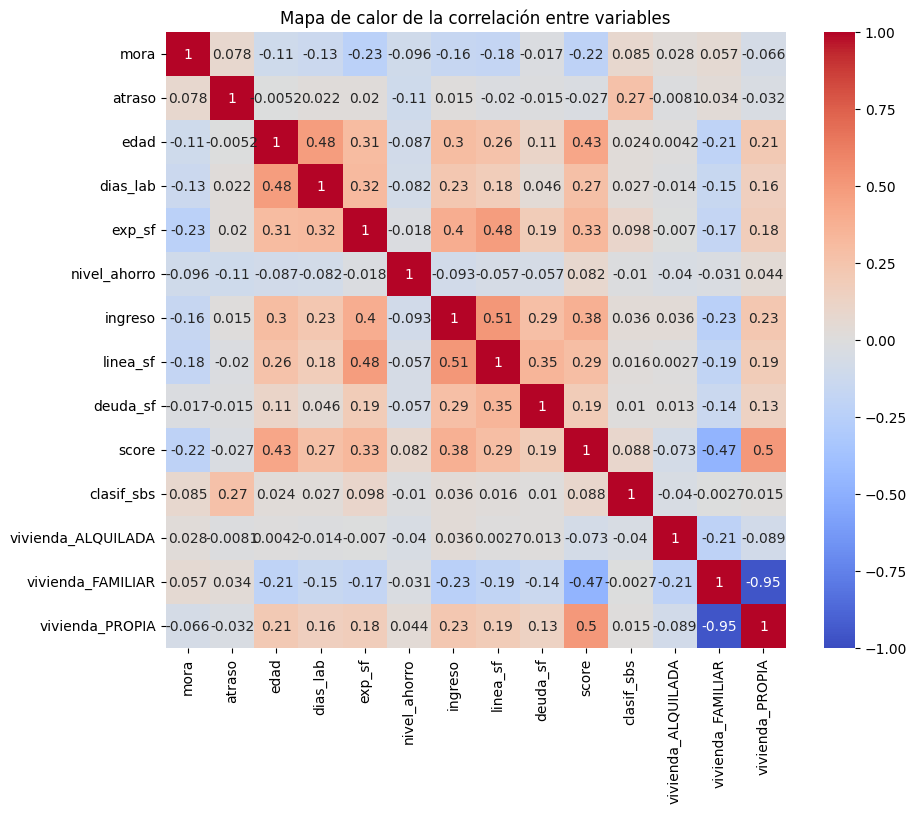

In [189]:
# Crear un subset de solo las variables numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64','boolean'])

# Calcular la matriz de correlación
corr_matrix = numerical_df.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables')
plt.show()


In [190]:
from sklearn.model_selection import train_test_split

# Seleccionar características (features) y la variable objetivo (target)
X = df.drop(columns=['mora','zona'])
y = df['mora']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelo Regresión logística

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_RL = accuracy_score(y_test, y_pred)
matrix_RL = confusion_matrix(y_test, y_pred)
reporte_RL = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_RL:.2f}')
print('Matriz de confusión:')
print(matrix_RL)
print('Reporte de clasificación:')
print(reporte_RL)


Precisión del modelo: 0.71
Matriz de confusión:
[[  95  430]
 [  51 1104]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.18      0.28       525
           1       0.72      0.96      0.82      1155

    accuracy                           0.71      1680
   macro avg       0.69      0.57      0.55      1680
weighted avg       0.70      0.71      0.65      1680



c:\Users\lea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo Árboles de decisión

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_AD = accuracy_score(y_test, y_pred)
matrix_AD = confusion_matrix(y_test, y_pred)
reporte_AD = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_AD:.2f}')
print('Matriz de confusión:')
print(matrix_AD)
print('Reporte de clasificación:')
print(reporte_AD)

Precisión del modelo: 0.81
Matriz de confusión:
[[368 157]
 [160 995]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       525
           1       0.86      0.86      0.86      1155

    accuracy                           0.81      1680
   macro avg       0.78      0.78      0.78      1680
weighted avg       0.81      0.81      0.81      1680



### Modelo SVM

In [193]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Support Vector Machine
model = SVC()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_SVM = accuracy_score(y_test, y_pred)
matrix_SVM = confusion_matrix(y_test, y_pred)
reporte_SVM = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_SVM:.2f}')
print('Matriz de confusión:')
print(matrix_SVM)
print('Reporte de clasificación:')
print(reporte_SVM)


Precisión del modelo: 0.70
Matriz de confusión:
[[  52  473]
 [  29 1126]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.10      0.17       525
           1       0.70      0.97      0.82      1155

    accuracy                           0.70      1680
   macro avg       0.67      0.54      0.49      1680
weighted avg       0.68      0.70      0.62      1680



# FASE 5: Evaluación del modelo

In [9]:

# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load('modelo_arbol_decision.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'modelo_arbol_decision.pkl'

In [195]:
# using traditional dtaset, i need to create a new dataset for validate the model
#Carga Dataset
new_values = pd.read_csv('prueba - prueba.csv', sep=",")

predicciones_nuevas = modelo_cargado.predict(new_values)

print(f'Predicciones para los nuevos datos: {predicciones_nuevas}')


Predicciones para los nuevos datos: [0 0 0 ... 1 1 1]
